In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import string # Special operations on strings
import spacy # language models 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_fsa = pd.read_csv(r"C:\Users\91730\OneDrive\Desktop\Projects - ExcelR\NLP Sentimental Analysis -2\financial_sentiment_data.csv",encoding="ISO-8859-1")

In [3]:
df_fsa

Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]

In [4]:
df = df_fsa.copy()

# EDA

In [5]:
df.columns

Index(['Sentence', 'Sentiment'], dtype='object')

In [6]:
df.shape

(5842, 2)

### Text Preprocessing:
remove both the leading and the trailing characters removes empty strings, because they are considered in Python as False Joining the list into one string/text

Remove Twitter username handles from a given twitter text. (Removes @usernames)

Again Joining the list into one string/text

Remove Punctuations

Remove https or url within text

Converting into Text Tokens

Tokenization

Remove Stopwords

Normalize the data

Stemming (Optional)

Lemmatization

#### Removes both the leading and the Trailing characters

In [7]:
df = [Sentence.strip() for Sentence in df.Sentence] 

#### Removes empty strings, because they are considered in Python as False

In [8]:
df = [Sentence for Sentence in df if Sentence] 

In [9]:
df

["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",
 '$ESI on lows, down $1.50 to $2.50 BK a real possibility',
 "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",
 'According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .',
 'The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .',
 "$SPY wouldn't be surprised to see a green close",
 "Shell's $70 Billion BG Deal Meets Shareholder Skepticism",
 'SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and 

#### Joining the list into one string/text

In [10]:
df= ' '.join(df)
df

'The GeoSolutions technology will leverage Benefon \'s GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model . $ESI on lows, down $1.50 to $2.50 BK a real possibility For the last quarter of 2010 , Componenta \'s net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m . According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia . The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland . $SPY wouldn\'t be surprised to see a green close Shell\'s $70 Billion BG Deal Meets Shareholder Skepticism SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its results to 

#### Removing @Username

In [11]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles = True)
review_no_uid = tokenizer.tokenize(df)
print(review_no_uid)

['The', 'GeoSolutions', 'technology', 'will', 'leverage', 'Benefon', "'", 's', 'GPS', 'solutions', 'by', 'providing', 'Location', 'Based', 'Search', 'Technology', ',', 'a', 'Communities', 'Platform', ',', 'location', 'relevant', 'multimedia', 'content', 'and', 'a', 'new', 'and', 'powerful', 'commercial', 'model', '.', '$', 'ESI', 'on', 'lows', ',', 'down', '$', '1.50', 'to', '$', '2.50', 'BK', 'a', 'real', 'possibility', 'For', 'the', 'last', 'quarter', 'of', '2010', ',', 'Componenta', "'", 's', 'net', 'sales', 'doubled', 'to', 'EUR', '131m', 'from', 'EUR', '76m', 'for', 'the', 'same', 'period', 'a', 'year', 'earlier', ',', 'while', 'it', 'moved', 'to', 'a', 'zero', 'pre-tax', 'profit', 'from', 'a', 'pre-tax', 'loss', 'of', 'EUR', '7m', '.', 'According', 'to', 'the', 'Finnish-Russian', 'Chamber', 'of', 'Commerce', ',', 'all', 'the', 'major', 'construction', 'companies', 'of', 'Finland', 'are', 'operating', 'in', 'Russia', '.', 'The', 'Swedish', 'buyout', 'firm', 'has', 'sold', 'its', '

#### Again Joining the list into one string/text

In [12]:
df =' '.join(review_no_uid)
df

'The GeoSolutions technology will leverage Benefon \' s GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model . $ ESI on lows , down $ 1.50 to $ 2.50 BK a real possibility For the last quarter of 2010 , Componenta \' s net sales doubled to EUR 131m from EUR 76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR 7m . According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia . The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland . $ SPY wouldn\'t be surprised to see a green close Shell\'s $ 70 Billion BG Deal Meets Shareholder Skepticism SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its 

#### Removing https or url within text

In [13]:
import re
df_no_url = re.sub(r'http\S+','',df)
df_no_url

'The GeoSolutions technology will leverage Benefon \' s GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model . $ ESI on lows , down $ 1.50 to $ 2.50 BK a real possibility For the last quarter of 2010 , Componenta \' s net sales doubled to EUR 131m from EUR 76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR 7m . According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia . The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland . $ SPY wouldn\'t be surprised to see a green close Shell\'s $ 70 Billion BG Deal Meets Shareholder Skepticism SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its 

#### Removing Punctuation

In [14]:
# Removing Punctuation
no_punc_df = df_no_url.translate(str.maketrans('','', string.punctuation)) 
# with arguments (x,y,z) where 'x' and 'y'
# must be equal-length strings and characters in x
# are replaced by characters in 'y' 'z'
# is a string (string.punctuation here)
no_punc_df

'The GeoSolutions technology will leverage Benefon  s GPS solutions by providing Location Based Search Technology  a Communities Platform  location relevant multimedia content and a new and powerful commercial model   ESI on lows  down  150 to  250 BK a real possibility For the last quarter of 2010  Componenta  s net sales doubled to EUR 131m from EUR 76m for the same period a year earlier  while it moved to a zero pretax profit from a pretax loss of EUR 7m  According to the FinnishRussian Chamber of Commerce  all the major construction companies of Finland are operating in Russia  The Swedish buyout firm has sold its remaining 224 percent stake  almost eighteen months after taking the company public in Finland   SPY wouldnt be surprised to see a green close Shells  70 Billion BG Deal Meets Shareholder Skepticism SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14  2008 AT 245 PM The Company updates its full year outlook and estimates its results to remain at loss for th

In [15]:
clean_text = re.sub(r'[^a-zA-Z]', ' ',no_punc_df)
clean_text

'The GeoSolutions technology will leverage Benefon  s GPS solutions by providing Location Based Search Technology  a Communities Platform  location relevant multimedia content and a new and powerful commercial model   ESI on lows  down      to      BK a real possibility For the last quarter of       Componenta  s net sales doubled to EUR    m from EUR   m for the same period a year earlier  while it moved to a zero pretax profit from a pretax loss of EUR  m  According to the FinnishRussian Chamber of Commerce  all the major construction companies of Finland are operating in Russia  The Swedish buyout firm has sold its remaining     percent stake  almost eighteen months after taking the company public in Finland   SPY wouldnt be surprised to see a green close Shells     Billion BG Deal Meets Shareholder Skepticism SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER          AT     PM The Company updates its full year outlook and estimates its results to remain at loss for th

### Tokenization

In [16]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(clean_text)
text_tokens

['The',
 'GeoSolutions',
 'technology',
 'will',
 'leverage',
 'Benefon',
 's',
 'GPS',
 'solutions',
 'by',
 'providing',
 'Location',
 'Based',
 'Search',
 'Technology',
 'a',
 'Communities',
 'Platform',
 'location',
 'relevant',
 'multimedia',
 'content',
 'and',
 'a',
 'new',
 'and',
 'powerful',
 'commercial',
 'model',
 'ESI',
 'on',
 'lows',
 'down',
 'to',
 'BK',
 'a',
 'real',
 'possibility',
 'For',
 'the',
 'last',
 'quarter',
 'of',
 'Componenta',
 's',
 'net',
 'sales',
 'doubled',
 'to',
 'EUR',
 'm',
 'from',
 'EUR',
 'm',
 'for',
 'the',
 'same',
 'period',
 'a',
 'year',
 'earlier',
 'while',
 'it',
 'moved',
 'to',
 'a',
 'zero',
 'pretax',
 'profit',
 'from',
 'a',
 'pretax',
 'loss',
 'of',
 'EUR',
 'm',
 'According',
 'to',
 'the',
 'FinnishRussian',
 'Chamber',
 'of',
 'Commerce',
 'all',
 'the',
 'major',
 'construction',
 'companies',
 'of',
 'Finland',
 'are',
 'operating',
 'in',
 'Russia',
 'The',
 'Swedish',
 'buyout',
 'firm',
 'has',
 'sold',
 'its',
 're

In [17]:
len(text_tokens)

103481

#### Removing Stopwords

In [18]:
stop = pd.read_csv(r'C:\Users\91730\OneDrive\Desktop\Assignments\11 - Text Mining\stop.txt')

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')

stop_words_file = ['laptop','the', 'I' , 'ye', 'yeah', 'ya', 'haha', 'Have', 'yes', 'Yes', 'rt','sq','It','A', 'B', 'C', 'T', 'W', 'u','s','m','X','V','L','G','LT','us','mn','RT','ojy','oyj','mln','u0001f923', 'U','Q', 'F', 'g']
my_stop_words.extend(stop_words_file)

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
no_stop_tokens = [word for word in no_stop_tokens if not word in stop]
no_stop_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91730\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91730\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['The',
 'GeoSolutions',
 'technology',
 'leverage',
 'Benefon',
 'GPS',
 'solutions',
 'providing',
 'Location',
 'Based',
 'Search',
 'Technology',
 'Communities',
 'Platform',
 'location',
 'relevant',
 'multimedia',
 'content',
 'new',
 'powerful',
 'commercial',
 'model',
 'ESI',
 'lows',
 'BK',
 'real',
 'possibility',
 'For',
 'last',
 'quarter',
 'Componenta',
 'net',
 'sales',
 'doubled',
 'EUR',
 'EUR',
 'period',
 'year',
 'earlier',
 'moved',
 'zero',
 'pretax',
 'profit',
 'pretax',
 'loss',
 'EUR',
 'According',
 'FinnishRussian',
 'Chamber',
 'Commerce',
 'major',
 'construction',
 'companies',
 'Finland',
 'operating',
 'Russia',
 'The',
 'Swedish',
 'buyout',
 'firm',
 'sold',
 'remaining',
 'percent',
 'stake',
 'almost',
 'eighteen',
 'months',
 'taking',
 'company',
 'public',
 'Finland',
 'SPY',
 'wouldnt',
 'surprised',
 'see',
 'green',
 'close',
 'Shells',
 'Billion',
 'BG',
 'Deal',
 'Meets',
 'Shareholder',
 'Skepticism',
 'SSH',
 'COMMUNICATIONS',
 'SECURITY'

In [20]:
len(no_stop_tokens)

66623

In [21]:
len(text_tokens) - len(no_stop_tokens)

36858

1330 Stop words were removed

#### Normalize the data

In [22]:
lower_words = [x.lower() for x in no_stop_tokens]
lower_words

['the',
 'geosolutions',
 'technology',
 'leverage',
 'benefon',
 'gps',
 'solutions',
 'providing',
 'location',
 'based',
 'search',
 'technology',
 'communities',
 'platform',
 'location',
 'relevant',
 'multimedia',
 'content',
 'new',
 'powerful',
 'commercial',
 'model',
 'esi',
 'lows',
 'bk',
 'real',
 'possibility',
 'for',
 'last',
 'quarter',
 'componenta',
 'net',
 'sales',
 'doubled',
 'eur',
 'eur',
 'period',
 'year',
 'earlier',
 'moved',
 'zero',
 'pretax',
 'profit',
 'pretax',
 'loss',
 'eur',
 'according',
 'finnishrussian',
 'chamber',
 'commerce',
 'major',
 'construction',
 'companies',
 'finland',
 'operating',
 'russia',
 'the',
 'swedish',
 'buyout',
 'firm',
 'sold',
 'remaining',
 'percent',
 'stake',
 'almost',
 'eighteen',
 'months',
 'taking',
 'company',
 'public',
 'finland',
 'spy',
 'wouldnt',
 'surprised',
 'see',
 'green',
 'close',
 'shells',
 'billion',
 'bg',
 'deal',
 'meets',
 'shareholder',
 'skepticism',
 'ssh',
 'communications',
 'security'

In [23]:
len(lower_words)

66623

#### Stemming

In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
stemmed_tokens

['the',
 'geosolut',
 'technolog',
 'leverag',
 'benefon',
 'gp',
 'solut',
 'provid',
 'locat',
 'base',
 'search',
 'technolog',
 'commun',
 'platform',
 'locat',
 'relev',
 'multimedia',
 'content',
 'new',
 'power',
 'commerci',
 'model',
 'esi',
 'low',
 'bk',
 'real',
 'possibl',
 'for',
 'last',
 'quarter',
 'componenta',
 'net',
 'sale',
 'doubl',
 'eur',
 'eur',
 'period',
 'year',
 'earlier',
 'move',
 'zero',
 'pretax',
 'profit',
 'pretax',
 'loss',
 'eur',
 'accord',
 'finnishrussian',
 'chamber',
 'commerc',
 'major',
 'construct',
 'compani',
 'finland',
 'oper',
 'russia',
 'the',
 'swedish',
 'buyout',
 'firm',
 'sold',
 'remain',
 'percent',
 'stake',
 'almost',
 'eighteen',
 'month',
 'take',
 'compani',
 'public',
 'finland',
 'spi',
 'wouldnt',
 'surpris',
 'see',
 'green',
 'close',
 'shell',
 'billion',
 'bg',
 'deal',
 'meet',
 'sharehold',
 'skeptic',
 'ssh',
 'commun',
 'secur',
 'corp',
 'stock',
 'exchang',
 'releas',
 'octob',
 'at',
 'pm',
 'the',
 'compan

#### Lemmatization

In [25]:
# NLP english language model of spacy library

nlp = spacy.load("en_core_web_md")
nlp

In [26]:
# Lemmas being one of them but mostlt POS, which will follow later
doc = nlp(' '.join(lower_words))
doc

the geosolutions technology leverage benefon gps solutions providing location based search technology communities platform location relevant multimedia content new powerful commercial model esi lows bk real possibility for last quarter componenta net sales doubled eur eur period year earlier moved zero pretax profit pretax loss eur according finnishrussian chamber commerce major construction companies finland operating russia the swedish buyout firm sold remaining percent stake almost eighteen months taking company public finland spy wouldnt surprised see green close shells billion bg deal meets shareholder skepticism ssh communications security corp stock exchange release october at pm the company updates full year outlook estimates results remain loss full year kone net sales rose yearonyear first nine months the stockmann department store total floor space square metres stockmann investment project price tag eur million circulation revenue increased finland sweden sap disappoints so

In [27]:
lemmas = [token.lemma_ for token in doc]
print(lemmas) 

['the', 'geosolution', 'technology', 'leverage', 'benefon', 'gps', 'solution', 'provide', 'location', 'base', 'search', 'technology', 'community', 'platform', 'location', 'relevant', 'multimedia', 'content', 'new', 'powerful', 'commercial', 'model', 'esi', 'low', 'bk', 'real', 'possibility', 'for', 'last', 'quarter', 'componenta', 'net', 'sale', 'double', 'eur', 'eur', 'period', 'year', 'early', 'move', 'zero', 'pretax', 'profit', 'pretax', 'loss', 'eur', 'accord', 'finnishrussian', 'chamber', 'commerce', 'major', 'construction', 'company', 'finland', 'operate', 'russia', 'the', 'swedish', 'buyout', 'firm', 'sell', 'remain', 'percent', 'stake', 'almost', 'eighteen', 'month', 'take', 'company', 'public', 'finland', 'spy', 'would', 'not', 'surprise', 'see', 'green', 'close', 'shell', 'billion', 'bg', 'deal', 'meet', 'shareholder', 'skepticism', 'ssh', 'communications', 'security', 'corp', 'stock', 'exchange', 'release', 'october', 'at', 'pm', 'the', 'company', 'update', 'full', 'year', '

In [28]:
lemmas_series = pd.Series(lemmas)
lemmas_series.value_counts()

eur           1732
the           1310
company        917
profit         584
say            580
              ... 
normalise        1
datadriven       1
factbased        1
applaud          1
strips           1
Length: 8868, dtype: int64

#### Clean tweets

In [29]:
clean_Reviews =' '.join(lemmas)
clean_Reviews

'the geosolution technology leverage benefon gps solution provide location base search technology community platform location relevant multimedia content new powerful commercial model esi low bk real possibility for last quarter componenta net sale double eur eur period year early move zero pretax profit pretax loss eur accord finnishrussian chamber commerce major construction company finland operate russia the swedish buyout firm sell remain percent stake almost eighteen month take company public finland spy would not surprise see green close shell billion bg deal meet shareholder skepticism ssh communications security corp stock exchange release october at pm the company update full year outlook estimate result remain loss full year kone net sale rise yearonyear first nine month the stockmann department store total floor space square metre stockmann investment project price tag eur million circulation revenue increase finland sweden sap disappoint software license real problem cloud 

### Word cloud for All words

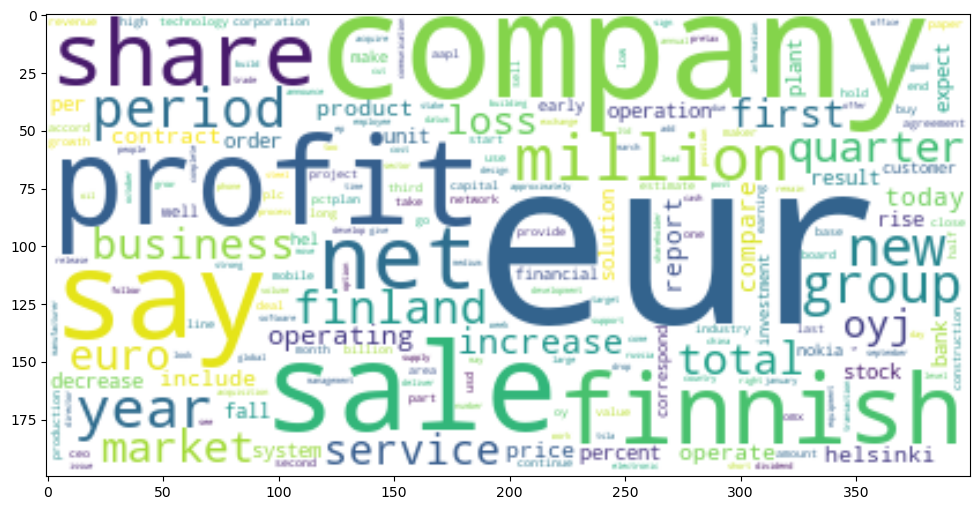

In [30]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(clean_Reviews)
plt.imshow(word_cloud, interpolation='bilinear') 

### Featurization / Vectorization
Machines only understands numbers so we have to convert text into numeric models.

Two popular techniques to perform Featurization / Vectorization:

1) Bag of words (Simple vectorization)

2) TF-IDF (Term Frequency - Inverse Document Frequency)


#### Bag of words

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(lemmas)

the numbers are not counts, they are the position in the sparse vector.

Each column(feature) in the sparse matrix represents a unique word in the vocabulary

In [32]:
print(vectorizer.vocabulary_)

{'the': 7865, 'geosolution': 3053, 'technology': 7774, 'leverage': 4335, 'benefon': 739, 'gps': 3136, 'solution': 7268, 'provide': 6135, 'location': 4438, 'base': 662, 'search': 6913, 'community': 1448, 'platform': 5849, 'relevant': 6434, 'multimedia': 5021, 'content': 1579, 'new': 5136, 'powerful': 5960, 'commercial': 1430, 'model': 4914, 'esi': 2449, 'low': 4491, 'bk': 817, 'real': 6312, 'possibility': 5938, 'for': 2849, 'last': 4251, 'quarter': 6205, 'componenta': 1495, 'net': 5120, 'sale': 6778, 'double': 2119, 'eur': 2487, 'period': 5725, 'year': 8785, 'early': 2197, 'move': 4989, 'zero': 8833, 'pretax': 6018, 'profit': 6080, 'loss': 4480, 'accord': 48, 'finnishrussian': 2763, 'chamber': 1241, 'commerce': 1429, 'major': 4586, 'construction': 1562, 'company': 1466, 'finland': 2751, 'operate': 5419, 'russia': 6724, 'swedish': 7653, 'buyout': 1058, 'firm': 2773, 'sell': 6950, 'remain': 6443, 'percent': 5718, 'stake': 7387, 'almost': 260, 'eighteen': 2272, 'month': 4946, 'take': 7704,

In [33]:
print(vectorizer.get_feature_names())

['aa', 'aal', 'aaland', 'aalto', 'aaltonen', 'aapl', 'aaron', 'aava', 'aazhang', 'ab', 'abandon', 'abb', 'abbott', 'abbv', 'abc', 'aberdeen', 'aberration', 'abidjan', 'ability', 'able', 'abloy', 'abn', 'aboavista', 'about', 'abov', 'above', 'abovementione', 'abp', 'abramov', 'abramovich', 'abroad', 'absentee', 'absolut', 'ac', 'aca', 'acad', 'academics', 'acanb', 'acando', 'accelerate', 'accept', 'access', 'accessorie', 'accessory', 'accident', 'accommodate', 'accommodation', 'accomplish', 'accord', 'accordance', 'according', 'accordingly', 'account', 'accountant', 'accounting', 'accrue', 'accumulate', 'accumulated', 'accumulation', 'accuse', 'ace', 'acerta', 'acg', 'achieve', 'achievement', 'acid', 'ackman', 'acknowledge', 'acnielsen', 'acom', 'acquire', 'acquirer', 'acquires', 'acquisition', 'acquit', 'across', 'acs', 'act', 'actelion', 'acting', 'action', 'activate', 'activation', 'active', 'actively', 'activeness', 'activision', 'activity', 'actor', 'actual', 'actually', 'ad', 'ada

In [34]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
x.toarray().shape

(66679, 8848)

#### Let's see how can bigrams and trigrams can be included here.

In [36]:
vectorizer_ngram_range = CountVectorizer(analyzer = 'word', ngram_range = (1,3), min_df=0.00001)
X = vectorizer_ngram_range.fit_transform(lemmas).toarray()

In [37]:
print(vectorizer_ngram_range.vocabulary_)

{'the': 7865, 'geosolution': 3053, 'technology': 7774, 'leverage': 4335, 'benefon': 739, 'gps': 3136, 'solution': 7268, 'provide': 6135, 'location': 4438, 'base': 662, 'search': 6913, 'community': 1448, 'platform': 5849, 'relevant': 6434, 'multimedia': 5021, 'content': 1579, 'new': 5136, 'powerful': 5960, 'commercial': 1430, 'model': 4914, 'esi': 2449, 'low': 4491, 'bk': 817, 'real': 6312, 'possibility': 5938, 'for': 2849, 'last': 4251, 'quarter': 6205, 'componenta': 1495, 'net': 5120, 'sale': 6778, 'double': 2119, 'eur': 2487, 'period': 5725, 'year': 8785, 'early': 2197, 'move': 4989, 'zero': 8833, 'pretax': 6018, 'profit': 6080, 'loss': 4480, 'accord': 48, 'finnishrussian': 2763, 'chamber': 1241, 'commerce': 1429, 'major': 4586, 'construction': 1562, 'company': 1466, 'finland': 2751, 'operate': 5419, 'russia': 6724, 'swedish': 7653, 'buyout': 1058, 'firm': 2773, 'sell': 6950, 'remain': 6443, 'percent': 5718, 'stake': 7387, 'almost': 260, 'eighteen': 2272, 'month': 4946, 'take': 7704,

In [38]:
print(vectorizer_ngram_range.get_feature_names())

['aa', 'aal', 'aaland', 'aalto', 'aaltonen', 'aapl', 'aaron', 'aava', 'aazhang', 'ab', 'abandon', 'abb', 'abbott', 'abbv', 'abc', 'aberdeen', 'aberration', 'abidjan', 'ability', 'able', 'abloy', 'abn', 'aboavista', 'about', 'abov', 'above', 'abovementione', 'abp', 'abramov', 'abramovich', 'abroad', 'absentee', 'absolut', 'ac', 'aca', 'acad', 'academics', 'acanb', 'acando', 'accelerate', 'accept', 'access', 'accessorie', 'accessory', 'accident', 'accommodate', 'accommodation', 'accomplish', 'accord', 'accordance', 'according', 'accordingly', 'account', 'accountant', 'accounting', 'accrue', 'accumulate', 'accumulated', 'accumulation', 'accuse', 'ace', 'acerta', 'acg', 'achieve', 'achievement', 'acid', 'ackman', 'acknowledge', 'acnielsen', 'acom', 'acquire', 'acquirer', 'acquires', 'acquisition', 'acquit', 'across', 'acs', 'act', 'actelion', 'acting', 'action', 'activate', 'activation', 'active', 'actively', 'activeness', 'activision', 'activity', 'actor', 'actual', 'actually', 'ad', 'ada

In [39]:
word_count_df = pd.DataFrame(X,  columns=vectorizer_ngram_range.get_feature_names())
word_count_df

aa  aal  aaland  aalto  aaltonen  aapl  aaron  aava  aazhang  ab  ...  \
0       0    0       0      0         0     0      0     0        0   0  ...   
1       0    0       0      0         0     0      0     0        0   0  ...   
2       0    0       0      0         0     0      0     0        0   0  ...   
3       0    0       0      0         0     0      0     0        0   0  ...   
4       0    0       0      0         0     0      0     0        0   0  ...   
...    ..  ...     ...    ...       ...   ...    ...   ...      ...  ..  ...   
66674   0    0       0      0         0     0      0     0        0   0  ...   
66675   0    0       0      0         0     0      0     0        0   0  ...   
66676   0    0       0      0         0     0      0     0        0   0  ...   
66677   0    0       0      0         0     0      0     0        0   0  ...   
66678   0    0       0      0         0     0      0     0        0   0  ...   

       zloty  znga  zoltan  zone  zoo  zs  zsl  zte  zu  zurich  
0          0     0       0     0    0   0    0    0   0       0  
1          0     0       0     0    0   0    0    0   0       0  
2          0     0       0     0    0   0    0    0   0       0  
3          0     0       0     0    0   0    0    0   0       0  
4          0     0       0     0    0   0    0    0   0       0  
...      ...   ...     ...   ...  ...  ..  ...  ...  ..     ...  
66674      0     0       0     0    0   0    0    0   0       0  
66675      0     0       0     0    0   0    0    0   0       0  
66676      0     0       0     0    0   0    0    0   0       0  
66677      0     0       0     0    0   0    0    0   0       0  
66678      0     0       0     0    0   0    0    0   0       0  

[66679 rows x 8848 columns]

##### We need to analyse sentiments at individual tweet level, so we need DataFrame intact and tweets different from each other. 

In [40]:
df_fsa

Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]

In [41]:
import re

In [42]:
corpus = []

for i in range(0, len(df_fsa)):
    review = re.sub('@[^\s]+' , '' , df_fsa.Sentence[i]) # remove @
    review = re.sub(r'http\S+' , '', review ) #remove URL
    review = re.sub(r'[^\w\s]', '', review) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review)
    
    corpus.append(review)
    

In [43]:
corpus

['the geosolutions technology will leverage benefon s gps solutions by providing location based search technology  a communities platform  location relevant multimedia content and a new and powerful commercial model ',
 'esi on lows down  to  bk a real possibility',
 'for the last quarter of   componenta s net sales doubled to eurm from eurm for the same period a year earlier  while it moved to a zero pretax profit from a pretax loss of eurm ',
 'according to the finnishrussian chamber of commerce  all the major construction companies of finland are operating in russia ',
 'the swedish buyout firm has sold its remaining  percent stake  almost eighteen months after taking the company public in finland ',
 'spy wouldnt be surprised to see a green close',
 'shells  billion bg deal meets shareholder skepticism',
 'ssh communications security corp stock exchange release october    at  pm the company updates its full year outlook and estimates its results to remain at loss for the full year 

In [44]:
df_fsa['clean_Sentence'] = corpus

In [45]:
from nltk.corpus import stopwords

my_stop_words = stopwords.words('english')

stop_words_file = ['the', 'I' , 'ye', 'yeah', 'ya', 'haha', 'Have', 'yes', 'Yes', 'rt','sq','It','A', 'B', 'C', 'T', 'W', 'u','s','m','X','V','L','G','LT','us','mn','RT','ojy','oyj','mln', 'u0001f923', 'U','Q', 'F', 'g']
my_stop_words.extend(stop_words_file)

stopwords_set = set(my_stop_words)
cleaned_df_fsa = []

for i in range (0,len(df_fsa)):
    
    words_without_stopwords = [word for word in df_fsa.clean_Sentence[i].split() if not word in my_stop_words]
    
    cleaned_df_fsa.append(' '.join(words_without_stopwords))
    
df_fsa['final_cleaned_Sentence'] = cleaned_df_fsa
df_fsa

Sentence Sentiment  \
0     The GeoSolutions technology will leverage Bene...  positive   
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2     For the last quarter of 2010 , Componenta 's n...  positive   
3     According to the Finnish-Russian Chamber of Co...   neutral   
4     The Swedish buyout firm has sold its remaining...   neutral   
...                                                 ...       ...   
5837  RISING costs have forced packaging producer Hu...  negative   
5838  Nordic Walking was first used as a summer trai...   neutral   
5839  According shipping company Viking Line , the E...   neutral   
5840  In the building and home improvement trade , s...   neutral   
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive   

                                         clean_Sentence  \
0     the geosolutions technology will leverage bene...   
1           esi on lows down  to  bk a real possibility   
2     for the last quarter of   componenta s net sal...   
3     according to the finnishrussian chamber of com...   
4     the swedish buyout firm has sold its remaining...   
...                                                 ...   
5837  rising costs have forced packaging producer hu...   
5838  nordic walking was first used as a summer trai...   
5839  according shipping company viking line  the eu...   
5840  in the building and home improvement trade  sa...   
5841  helsinki afx  kci konecranes said it has won a...   

                                 final_cleaned_Sentence  
0     geosolutions technology leverage benefon gps s...  
1                          esi lows bk real possibility  
2     last quarter componenta net sales doubled eurm...  
3     according finnishrussian chamber commerce majo...  
4     swedish buyout firm sold remaining percent sta...  
...                                                 ...  
5837  rising costs forced packaging producer huhtama...  
5838  nordic walking first used summer training meth...  
5839  according shipping company viking line eu deci...  
5840  building home improvement trade sales decrease...  
5841  helsinki afx kci konecranes said order four ho...  

[5842 rows x 4 columns]

In [46]:
df_fsa = df_fsa[df_fsa['final_cleaned_Sentence']!='']

In [47]:
df_fsa = df_fsa.reset_index(drop=True)

#### Tokenisation

In [48]:
tokenized_Sentence = df_fsa['final_cleaned_Sentence'].apply(lambda x: x.split())
tokenized_Sentence

0       [geosolutions, technology, leverage, benefon, ...
1                      [esi, lows, bk, real, possibility]
2       [last, quarter, componenta, net, sales, double...
3       [according, finnishrussian, chamber, commerce,...
4       [swedish, buyout, firm, sold, remaining, perce...
                              ...                        
5836    [rising, costs, forced, packaging, producer, h...
5837    [nordic, walking, first, used, summer, trainin...
5838    [according, shipping, company, viking, line, e...
5839    [building, home, improvement, trade, sales, de...
5840    [helsinki, afx, kci, konecranes, said, order, ...
Name: final_cleaned_Sentence, Length: 5841, dtype: object

#### Lemmatisation

In [49]:
import nltk
nltk.download('omw-1.4') 
nltk.download('wordnet')  

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_Sentence = tokenized_Sentence.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_Sentence.head(10) 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91730\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91730\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [geosolutions, technology, leverage, benefon, ...
1                    [esi, low, bk, real, possibility]
2    [last, quarter, componenta, net, sale, doubled...
3    [according, finnishrussian, chamber, commerce,...
4    [swedish, buyout, firm, sold, remaining, perce...
5         [spy, wouldnt, surprised, see, green, close]
6    [shell, billion, bg, deal, meet, shareholder, ...
7    [ssh, communication, security, corp, stock, ex...
8    [kone, net, sale, rose, yearonyear, first, nin...
9    [stockmann, department, store, total, floor, s...
Name: final_cleaned_Sentence, dtype: object

#### joining tokens into sentence

In [50]:
for i, tokens in enumerate(tokenized_Sentence):
    tokenized_Sentence[i] = ' '.join(tokens)

df_fsa['final_cleaned_Sentence'] = tokenized_Sentence
df_fsa

Sentence Sentiment  \
0     The GeoSolutions technology will leverage Bene...  positive   
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2     For the last quarter of 2010 , Componenta 's n...  positive   
3     According to the Finnish-Russian Chamber of Co...   neutral   
4     The Swedish buyout firm has sold its remaining...   neutral   
...                                                 ...       ...   
5836  RISING costs have forced packaging producer Hu...  negative   
5837  Nordic Walking was first used as a summer trai...   neutral   
5838  According shipping company Viking Line , the E...   neutral   
5839  In the building and home improvement trade , s...   neutral   
5840  HELSINKI AFX - KCI Konecranes said it has won ...  positive   

                                         clean_Sentence  \
0     the geosolutions technology will leverage bene...   
1           esi on lows down  to  bk a real possibility   
2     for the last quarter of   componenta s net sal...   
3     according to the finnishrussian chamber of com...   
4     the swedish buyout firm has sold its remaining...   
...                                                 ...   
5836  rising costs have forced packaging producer hu...   
5837  nordic walking was first used as a summer trai...   
5838  according shipping company viking line  the eu...   
5839  in the building and home improvement trade  sa...   
5840  helsinki afx  kci konecranes said it has won a...   

                                 final_cleaned_Sentence  
0     geosolutions technology leverage benefon gps s...  
1                           esi low bk real possibility  
2     last quarter componenta net sale doubled eurm ...  
3     according finnishrussian chamber commerce majo...  
4     swedish buyout firm sold remaining percent sta...  
...                                                 ...  
5836  rising cost forced packaging producer huhtamak...  
5837  nordic walking first used summer training meth...  
5838  according shipping company viking line eu deci...  
5839  building home improvement trade sale decreased...  
5840  helsinki afx kci konecranes said order four ho...  

[5841 rows x 4 columns]

### Feature Extraction

##### Bag of words

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df_fsa.final_cleaned_Sentence) 

In [52]:
vectorizer.vocabulary_

{'geosolutions': 3319,
 'technology': 8313,
 'leverage': 4675,
 'benefon': 777,
 'gps': 3405,
 'solution': 7772,
 'providing': 6532,
 'location': 4780,
 'based': 694,
 'search': 7382,
 'community': 1536,
 'platform': 6217,
 'relevant': 6874,
 'multimedia': 5382,
 'content': 1692,
 'new': 5498,
 'powerful': 6333,
 'commercial': 1517,
 'model': 5277,
 'esi': 2648,
 'low': 4841,
 'bk': 860,
 'real': 6733,
 'possibility': 6308,
 'last': 4584,
 'quarter': 6614,
 'componenta': 1587,
 'net': 5484,
 'sale': 7245,
 'doubled': 2287,
 'eurm': 2691,
 'period': 6087,
 'year': 9354,
 'earlier': 2373,
 'moved': 5350,
 'zero': 9403,
 'pretax': 6397,
 'profit': 6465,
 'loss': 4829,
 'according': 48,
 'finnishrussian': 3008,
 'chamber': 1307,
 'commerce': 1516,
 'major': 4941,
 'construction': 1674,
 'company': 1554,
 'finland': 2996,
 'operating': 5787,
 'russia': 7191,
 'swedish': 8188,
 'buyout': 1115,
 'firm': 3017,
 'sold': 7764,
 'remaining': 6887,
 'percent': 6079,
 'stake': 7900,
 'almost': 271,

In [53]:
vectorizer.get_feature_names()

['aa',
 'aal',
 'aaland',
 'aalto',
 'aaltonen',
 'aapl',
 'aaron',
 'aava',
 'aazhang',
 'ab',
 'abandon',
 'abb',
 'abbott',
 'abbv',
 'abc',
 'aberdeen',
 'aberration',
 'abidjan',
 'ability',
 'able',
 'abloy',
 'abn',
 'aboavista',
 'abov',
 'abovementioned',
 'abp',
 'abramov',
 'abramovich',
 'abroad',
 'absentee',
 'absolut',
 'ac',
 'aca',
 'acad',
 'academic',
 'acanb',
 'acando',
 'accelerate',
 'accelerated',
 'accepted',
 'access',
 'accessory',
 'accident',
 'accommodate',
 'accommodation',
 'accomplish',
 'accomplishing',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accountant',
 'accounted',
 'accounting',
 'accrue',
 'accumulate',
 'accumulated',
 'accumulating',
 'accumulation',
 'accused',
 'accuses',
 'ace',
 'acerta',
 'acgv',
 'achieve',
 'achieved',
 'achievement',
 'acid',
 'ackman',
 'acknowledged',
 'acnielsen',
 'acom',
 'acquire',
 'acquired',
 'acquirer',
 'acquires',
 'acquiring',
 'acquisition',
 'acquitted',
 'across',
 'act',
 'acted',
 'a

In [54]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=2)
X = vectorizer.fit_transform(df_fsa.final_cleaned_Sentence).toarray()

In [55]:
words_count = pd.DataFrame(X, columns=vectorizer.get_feature_names())
words_count

aaland  aaland island  aapl  aapl aapl  aapl axp  aapl bounce  \
0          0              0     0          0         0            0   
1          0              0     0          0         0            0   
2          0              0     0          0         0            0   
3          0              0     0          0         0            0   
4          0              0     0          0         0            0   
...      ...            ...   ...        ...       ...          ...   
5836       0              0     0          0         0            0   
5837       0              0     0          0         0            0   
5838       0              0     0          0         0            0   
5839       0              0     0          0         0            0   
5840       0              0     0          0         0            0   

      aapl call  aapl im  aapl resistance  aapl short  ...  â¼ per share  ã³  \
0             0        0                0           0  ...             0   0   
1             0        0                0           0  ...             0   0   
2             0        0                0           0  ...             0   0   
3             0        0                0           0  ...             0   0   
4             0        0                0           0  ...             0   0   
...         ...      ...              ...         ...  ...           ...  ..   
5836          0        0                0           0  ...             0   0   
5837          0        0                0           0  ...             0   0   
5838          0        0                0           0  ...             0   0   
5839          0        0                0           0  ...             0   0   
5840          0        0                0           0  ...             0   0   

      ã³ xa  ã³ xa â¼  ãâ  ãâm  ãâm cost  ãââ  ãã  ããnekoski  
0         0         0   0    0         0    0   0          0  
1         0         0   0    0         0    0   0          0  
2         0         0   0    0         0    0   0          0  
3         0         0   0    0         0    0   0          0  
4         0         0   0    0         0    0   0          0  
...     ...       ...  ..  ...       ...  ...  ..        ...  
5836      0         0   0    0         0    0   0          0  
5837      0         0   0    0         0    0   0          0  
5838      0         0   0    0         0    0   0          0  
5839      0         0   0    0         0    0   0          0  
5840      0         0   0    0         0    0   0          0  

[5841 rows x 17618 columns]

### TF-IDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 4000)
X = vectorizer.fit_transform(df_fsa.final_cleaned_Sentence).toarray()

count_df_tf_idf = pd.DataFrame(X, columns=vectorizer.get_feature_names())

count_df_tf_idf

aapl   ab  ab inbev  ab sto  abb  abc  able  abp  abp hel  abp hel fisa  \
0      0.0  0.0       0.0     0.0  0.0  0.0   0.0  0.0      0.0           0.0   
1      0.0  0.0       0.0     0.0  0.0  0.0   0.0  0.0      0.0           0.0   
2      0.0  0.0       0.0     0.0  0.0  0.0   0.0  0.0      0.0           0.0   
3      0.0  0.0       0.0     0.0  0.0  0.0   0.0  0.0      0.0           0.0   
4      0.0  0.0       0.0     0.0  0.0  0.0   0.0  0.0      0.0           0.0   
...    ...  ...       ...     ...  ...  ...   ...  ...      ...           ...   
5836   0.0  0.0       0.0     0.0  0.0  0.0   0.0  0.0      0.0           0.0   
5837   0.0  0.0       0.0     0.0  0.0  0.0   0.0  0.0      0.0           0.0   
5838   0.0  0.0       0.0     0.0  0.0  0.0   0.0  0.0      0.0           0.0   
5839   0.0  0.0       0.0     0.0  0.0  0.0   0.0  0.0      0.0           0.0   
5840   0.0  0.0       0.0     0.0  0.0  0.0   0.0  0.0      0.0           0.0   

      ...  zone   â¼  â¼ million  â¼ million ã³  â¼ per  â¼ per share   ã³  \
0     ...   0.0  0.0         0.0            0.0     0.0           0.0  0.0   
1     ...   0.0  0.0         0.0            0.0     0.0           0.0  0.0   
2     ...   0.0  0.0         0.0            0.0     0.0           0.0  0.0   
3     ...   0.0  0.0         0.0            0.0     0.0           0.0  0.0   
4     ...   0.0  0.0         0.0            0.0     0.0           0.0  0.0   
...   ...   ...  ...         ...            ...     ...           ...  ...   
5836  ...   0.0  0.0         0.0            0.0     0.0           0.0  0.0   
5837  ...   0.0  0.0         0.0            0.0     0.0           0.0  0.0   
5838  ...   0.0  0.0         0.0            0.0     0.0           0.0  0.0   
5839  ...   0.0  0.0         0.0            0.0     0.0           0.0  0.0   
5840  ...   0.0  0.0         0.0            0.0     0.0           0.0  0.0   

      ã³ xa  ã³ xa â¼  ãâm  
0       0.0       0.0  0.0  
1       0.0       0.0  0.0  
2       0.0       0.0  0.0  
3       0.0       0.0  0.0  
4       0.0       0.0  0.0  
...     ...       ...  ...  
5836    0.0       0.0  0.0  
5837    0.0       0.0  0.0  
5838    0.0       0.0  0.0  
5839    0.0       0.0  0.0  
5840    0.0       0.0  0.0  

[5841 rows x 4000 columns]

In [57]:
df_fsa

Sentence Sentiment  \
0     The GeoSolutions technology will leverage Bene...  positive   
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2     For the last quarter of 2010 , Componenta 's n...  positive   
3     According to the Finnish-Russian Chamber of Co...   neutral   
4     The Swedish buyout firm has sold its remaining...   neutral   
...                                                 ...       ...   
5836  RISING costs have forced packaging producer Hu...  negative   
5837  Nordic Walking was first used as a summer trai...   neutral   
5838  According shipping company Viking Line , the E...   neutral   
5839  In the building and home improvement trade , s...   neutral   
5840  HELSINKI AFX - KCI Konecranes said it has won ...  positive   

                                         clean_Sentence  \
0     the geosolutions technology will leverage bene...   
1           esi on lows down  to  bk a real possibility   
2     for the last quarter of   componenta s net sal...   
3     according to the finnishrussian chamber of com...   
4     the swedish buyout firm has sold its remaining...   
...                                                 ...   
5836  rising costs have forced packaging producer hu...   
5837  nordic walking was first used as a summer trai...   
5838  according shipping company viking line  the eu...   
5839  in the building and home improvement trade  sa...   
5840  helsinki afx  kci konecranes said it has won a...   

                                 final_cleaned_Sentence  
0     geosolutions technology leverage benefon gps s...  
1                           esi low bk real possibility  
2     last quarter componenta net sale doubled eurm ...  
3     according finnishrussian chamber commerce majo...  
4     swedish buyout firm sold remaining percent sta...  
...                                                 ...  
5836  rising cost forced packaging producer huhtamak...  
5837  nordic walking first used summer training meth...  
5838  according shipping company viking line eu deci...  
5839  building home improvement trade sale decreased...  
5840  helsinki afx kci konecranes said order four ho...  

[5841 rows x 4 columns]

### Sentiment Analysis

In [58]:
affinn = pd.read_csv(r'C:\Users\91730\OneDrive\Desktop\Assignments\11 - Text Mining\Afinn.csv', sep=',', encoding='latin-1')

In [59]:
affinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [60]:
words_value = affinn.set_index('word')['value'].to_dict()

In [61]:
words_value

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [62]:
sent = []
a = 0

In [63]:
for i in range(0,len(df_fsa)):
    
    for j in range(0,len(df_fsa.final_cleaned_Sentence[i].split() )):
        
        word = df_fsa.final_cleaned_Sentence[i].split()[j]
        if word in words_value:
            a = a + words_value[word]
    sent.append(a)
    a = 0

In [64]:
df_fsa

Sentence Sentiment  \
0     The GeoSolutions technology will leverage Bene...  positive   
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2     For the last quarter of 2010 , Componenta 's n...  positive   
3     According to the Finnish-Russian Chamber of Co...   neutral   
4     The Swedish buyout firm has sold its remaining...   neutral   
...                                                 ...       ...   
5836  RISING costs have forced packaging producer Hu...  negative   
5837  Nordic Walking was first used as a summer trai...   neutral   
5838  According shipping company Viking Line , the E...   neutral   
5839  In the building and home improvement trade , s...   neutral   
5840  HELSINKI AFX - KCI Konecranes said it has won ...  positive   

                                         clean_Sentence  \
0     the geosolutions technology will leverage bene...   
1           esi on lows down  to  bk a real possibility   
2     for the last quarter of   componenta s net sal...   
3     according to the finnishrussian chamber of com...   
4     the swedish buyout firm has sold its remaining...   
...                                                 ...   
5836  rising costs have forced packaging producer hu...   
5837  nordic walking was first used as a summer trai...   
5838  according shipping company viking line  the eu...   
5839  in the building and home improvement trade  sa...   
5840  helsinki afx  kci konecranes said it has won a...   

                                 final_cleaned_Sentence  
0     geosolutions technology leverage benefon gps s...  
1                           esi low bk real possibility  
2     last quarter componenta net sale doubled eurm ...  
3     according finnishrussian chamber commerce majo...  
4     swedish buyout firm sold remaining percent sta...  
...                                                 ...  
5836  rising cost forced packaging producer huhtamak...  
5837  nordic walking first used summer training meth...  
5838  according shipping company viking line eu deci...  
5839  building home improvement trade sale decreased...  
5840  helsinki afx kci konecranes said order four ho...  

[5841 rows x 4 columns]

In [65]:
df_fsa['words_value'] = sent
df_fsa[['final_cleaned_Sentence','words_value']]

final_cleaned_Sentence  words_value
0     geosolutions technology leverage benefon gps s...            3
1                           esi low bk real possibility            0
2     last quarter componenta net sale doubled eurm ...           -3
3     according finnishrussian chamber commerce majo...            0
4     swedish buyout firm sold remaining percent sta...            0
...                                                 ...          ...
5836  rising cost forced packaging producer huhtamak...           -2
5837  nordic walking first used summer training meth...            0
5838  according shipping company viking line eu deci...            1
5839  building home improvement trade sale decreased...            2
5840  helsinki afx kci konecranes said order four ho...            0

[5841 rows x 2 columns]

In [66]:
df_fsa['sentiment'] = df_fsa['words_value'].apply(lambda c: 'Positive' if c >0else ('Negative' if c<=-1 else 'Neutral'))

In [67]:
df_fsa

Sentence Sentiment  \
0     The GeoSolutions technology will leverage Bene...  positive   
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2     For the last quarter of 2010 , Componenta 's n...  positive   
3     According to the Finnish-Russian Chamber of Co...   neutral   
4     The Swedish buyout firm has sold its remaining...   neutral   
...                                                 ...       ...   
5836  RISING costs have forced packaging producer Hu...  negative   
5837  Nordic Walking was first used as a summer trai...   neutral   
5838  According shipping company Viking Line , the E...   neutral   
5839  In the building and home improvement trade , s...   neutral   
5840  HELSINKI AFX - KCI Konecranes said it has won ...  positive   

                                         clean_Sentence  \
0     the geosolutions technology will leverage bene...   
1           esi on lows down  to  bk a real possibility   
2     for the last quarter of   componenta s net sal...   
3     according to the finnishrussian chamber of com...   
4     the swedish buyout firm has sold its remaining...   
...                                                 ...   
5836  rising costs have forced packaging producer hu...   
5837  nordic walking was first used as a summer trai...   
5838  according shipping company viking line  the eu...   
5839  in the building and home improvement trade  sa...   
5840  helsinki afx  kci konecranes said it has won a...   

                                 final_cleaned_Sentence  words_value sentiment  
0     geosolutions technology leverage benefon gps s...            3  Positive  
1                           esi low bk real possibility            0   Neutral  
2     last quarter componenta net sale doubled eurm ...           -3  Negative  
3     according finnishrussian chamber commerce majo...            0   Neutral  
4     swedish buyout firm sold remaining percent sta...            0   Neutral  
...                                                 ...          ...       ...  
5836  rising cost forced packaging producer huhtamak...           -2  Negative  
5837  nordic walking first used summer training meth...            0   Neutral  
5838  according shipping company viking line eu deci...            1  Positive  
5839  building home improvement trade sale decreased...            2  Positive  
5840  helsinki afx kci konecranes said order four ho...            0   Neutral  

[5841 rows x 6 columns]

In [68]:
df_fsa_1 = df_fsa.iloc[:,3:6]
df_fsa_1

final_cleaned_Sentence  words_value sentiment
0     geosolutions technology leverage benefon gps s...            3  Positive
1                           esi low bk real possibility            0   Neutral
2     last quarter componenta net sale doubled eurm ...           -3  Negative
3     according finnishrussian chamber commerce majo...            0   Neutral
4     swedish buyout firm sold remaining percent sta...            0   Neutral
...                                                 ...          ...       ...
5836  rising cost forced packaging producer huhtamak...           -2  Negative
5837  nordic walking first used summer training meth...            0   Neutral
5838  according shipping company viking line eu deci...            1  Positive
5839  building home improvement trade sale decreased...            2  Positive
5840  helsinki afx kci konecranes said order four ho...            0   Neutral

[5841 rows x 3 columns]

### new Sentiment = sentence [s]

### whereas, Old Sentiment = Sentence [S]

In [69]:
print(df_fsa.Sentiment.value_counts())
print(df_fsa.sentiment.value_counts())

neutral     3129
positive    1852
negative     860
Name: Sentiment, dtype: int64
Neutral     3161
Positive    1894
Negative     786
Name: sentiment, dtype: int64


<AxesSubplot: xlabel='sentiment', ylabel='count'>

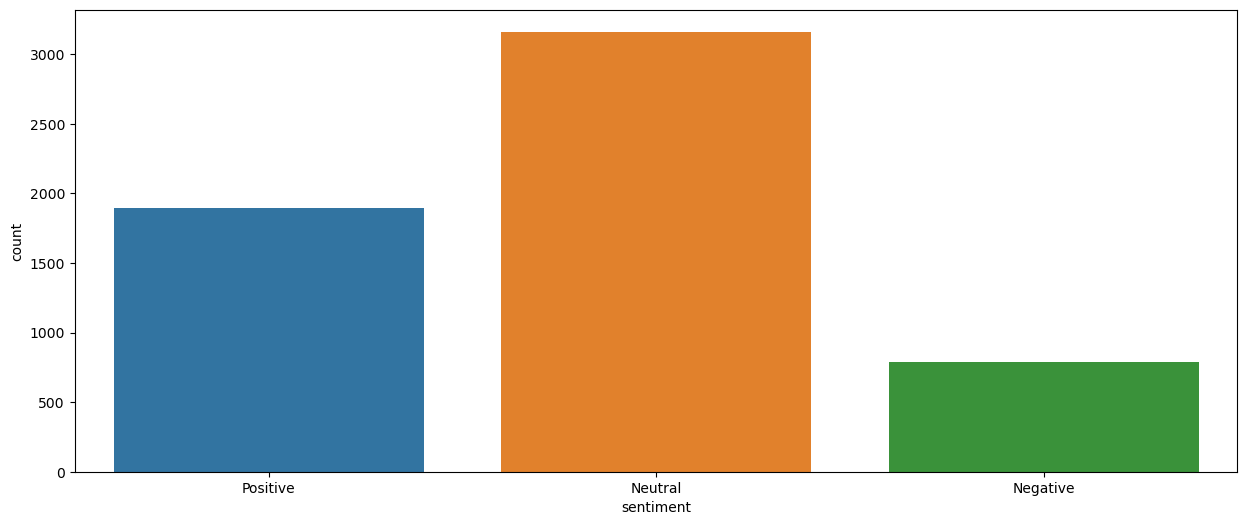

In [76]:
plt.figure(figsize=(15,6))
sns.countplot(df_fsa_1.sentiment) 

### Word cloud for Positive Words

In [70]:
positive = []
negative = []
neutral = []

In [71]:
for i in range(0,len(df_fsa_1)):
    
    for j in range(0,len(df_fsa_1.final_cleaned_Sentence[i].split() )):
        
        word = df_fsa_1.final_cleaned_Sentence[i].split()[j]
        if word in words_value:
            a = words_value[word]
            if a > 0:
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else:
                neutral.append(word)
        

In [72]:
positive = ' '.join(positive)

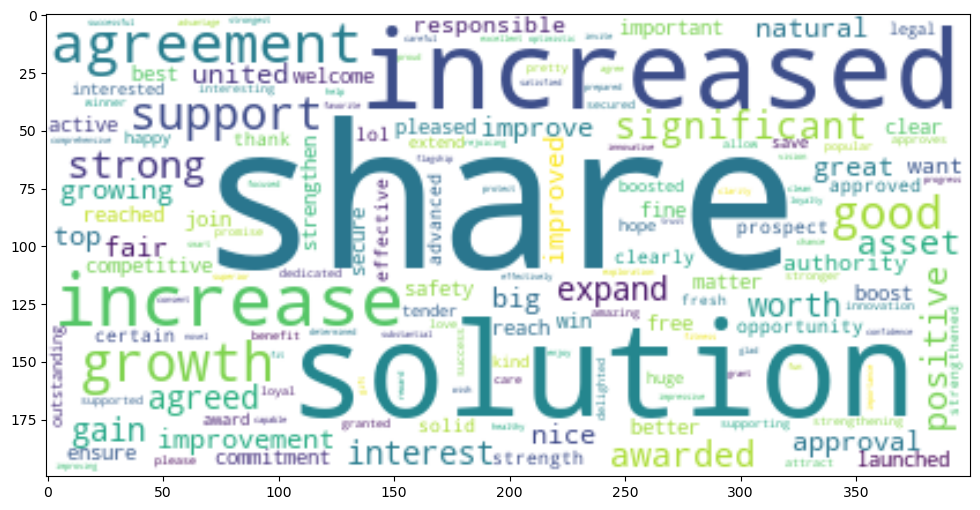

In [73]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(positive)
plt.imshow(word_cloud, interpolation = 'bilinear')

### Word cloud for Negative Words

In [74]:
negative = ' '.join(negative)

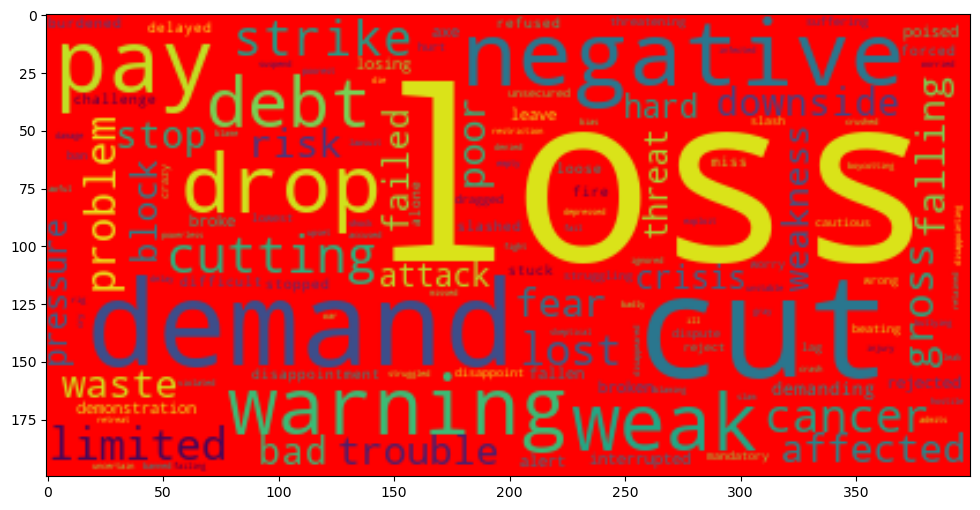

In [75]:
plt.figure(figsize=(18,6))
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'red').generate(negative)
plt.imshow(word_cloud, interpolation = 'bilinear')

## Thank You 